In [1]:
# Cell 1: 导入必要的库
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cell 2: 定义转换函数
def convert_to_black_and_white(image_path, output_path):
    # 读取彩色图像
    img = cv2.imread(image_path)
    
    # 将图像从BGR转换为HSV颜色空间
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 定义皮肤颜色范围 (以HSV为例)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    
    # 创建皮肤掩膜
    skin_mask = cv2.inRange(hsv_img, lower_skin, upper_skin)
    
    # 使用形态学操作来平滑掩膜并填补孔洞
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
    
    # 使用高斯模糊来减少细小的黑斑
    skin_mask = cv2.GaussianBlur(skin_mask, (7, 7), 0)
    
    # 将掩膜应用到原始图像上以提取皮肤区域
    skin_region = cv2.bitwise_and(img, img, mask=skin_mask)
    
    # 将提取的皮肤区域转换为灰度图像
    gray_skin_region = cv2.cvtColor(skin_region, cv2.COLOR_BGR2GRAY)
    
    # 将背景变为纯黑，并增强前景的亮度和对比度
    black_background = np.zeros_like(gray_skin_region)
    result_img = cv2.addWeighted(gray_skin_region, 2.5, black_background, 0, 50)
    
    # 保存处理后的图像
    cv2.imwrite(output_path, result_img)
    
    # 返回处理前后的图像用于在Notebook中显示
    return img, result_img

In [3]:
!ls

 cal.pkl
'Comparison of pictures before and after processing.png'
'Convert Image To Bw.ipynb'
 dataset.ipynb
 frame_00_01_0009.png
 frame_00_02_0016.png
 frame_00_03_0038.png
 frame_00_05_0041.png
 frame_00_06_0026.png
 frame_00_07_0084.png
 frame_00_09_0101.png
 frame_00_10_0009.png
 GESTURE_RECOGNITION_DATASET_cn.md
 GESTURE_RECOGNITION_DATASET.md
'Image Preprocessing.ipynb'
 man-palm-hand-in-front-isolated-on-white-2PRBK0W.jpg
 man-palm-hand-in-front-isolated-on-white-2PRBK0W_processed.jpg
 test.pkl
 train.pkl


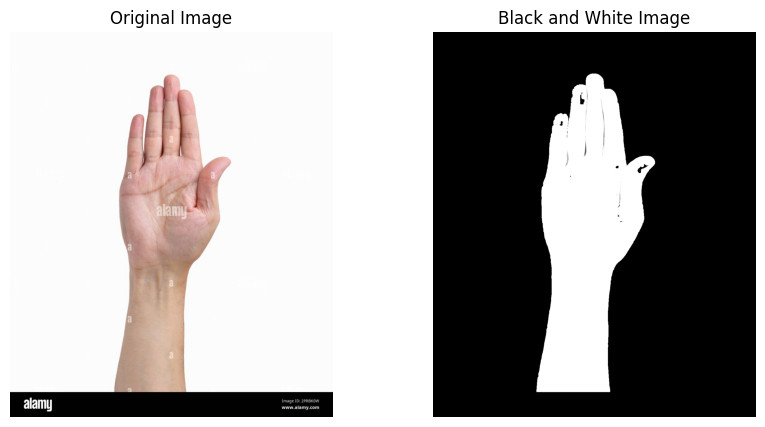

In [4]:
# Cell 3: 使用函数并在Notebook中显示结果
original_img, black_and_white_img = convert_to_black_and_white('man-palm-hand-in-front-isolated-on-white-2PRBK0W.jpg', 'output_image.jpg')

# 使用matplotlib在Notebook中显示原图和处理后的图像
plt.figure(figsize=(10, 5))

# 显示原图
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 显示处理后的图像
plt.subplot(1, 2, 2)
plt.imshow(black_and_white_img, cmap='gray')
plt.title('Black and White Image')
plt.axis('off')

plt.show()